In [9]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import fiona

In [2]:
geodf = geopandas.read_file("Caltrain_GIS/commondata/data")

In [3]:
geodf.head()

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Snippet,PopupInfo,HasLabel,LabelID,Label,Label_1,NEAR_FID,NEAR_DIST,geometry
0,0,Point 1,Mission Bay Blvd,2,-1,0.0,None,None,-1,0,GC-1,1,1464,0.003639,POINT Z (-122.3985314 37.76955290000006 0)
1,0,Point 2,16th Street,2,-1,0.0,None,None,-1,0,GC-2,2,1464,0.007951,POINT Z (-122.3946691 37.76660140000007 0)
2,0,Point 3,Linden Avenue,2,-1,0.0,None,None,-1,0,GC-3,3,488,0.004250,POINT Z (-122.4131334 37.64225070000003 0)
3,0,Point 4,Scott Street,2,-1,0.0,None,None,-1,0,GC-4,4,488,0.000815,POINT Z (-122.4130744 37.63722540000003 0)
4,0,Point 5,Center Street,2,-1,0.0,None,None,-1,0,GC-5,5,1484,0.013388,POINT Z (-122.3965037 37.60948470000005 0)


In [4]:
geodf.crs = {'init': 'epsg:4326'}

In [5]:
def map_points(ax, geodf, label_by=None, zoom=15, **kwargs):
    '''
    Plot information from a geodataframe on a map.

    Input:
    ax: a matplotlib axis
    geodf: a geopandas dataframe, with the geometry column labeled as "geometry"
    color_by: string, column name from geodf to use as a colorramp
    label_by: string, column name from geodf to use as labels/annotations
    zoom: int, zoom level for basemap
    '''

    w, s, e, n = geodf.to_crs(epsg=4326).total_bounds
    try:
        img, ext = ctx.bounds2img(w, s, e, n, zoom, ll=True)
        ax.imshow(img, extent=ext)
    except Exception as ex:
        print("encountered problem: {}".format(ex))

    new_crs_df = geodf.to_crs(epsg=3857)
    new_crs_df.plot(ax=ax, **kwargs)
    if label_by != None:
        new_crs_df.apply(lambda x: ax.annotate(s=x[label_by], xy=x.geometry.centroid.coords[0], ha='right', size=14, alpha=0.5),axis=1)
    ax.axis('off')

    return ax

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


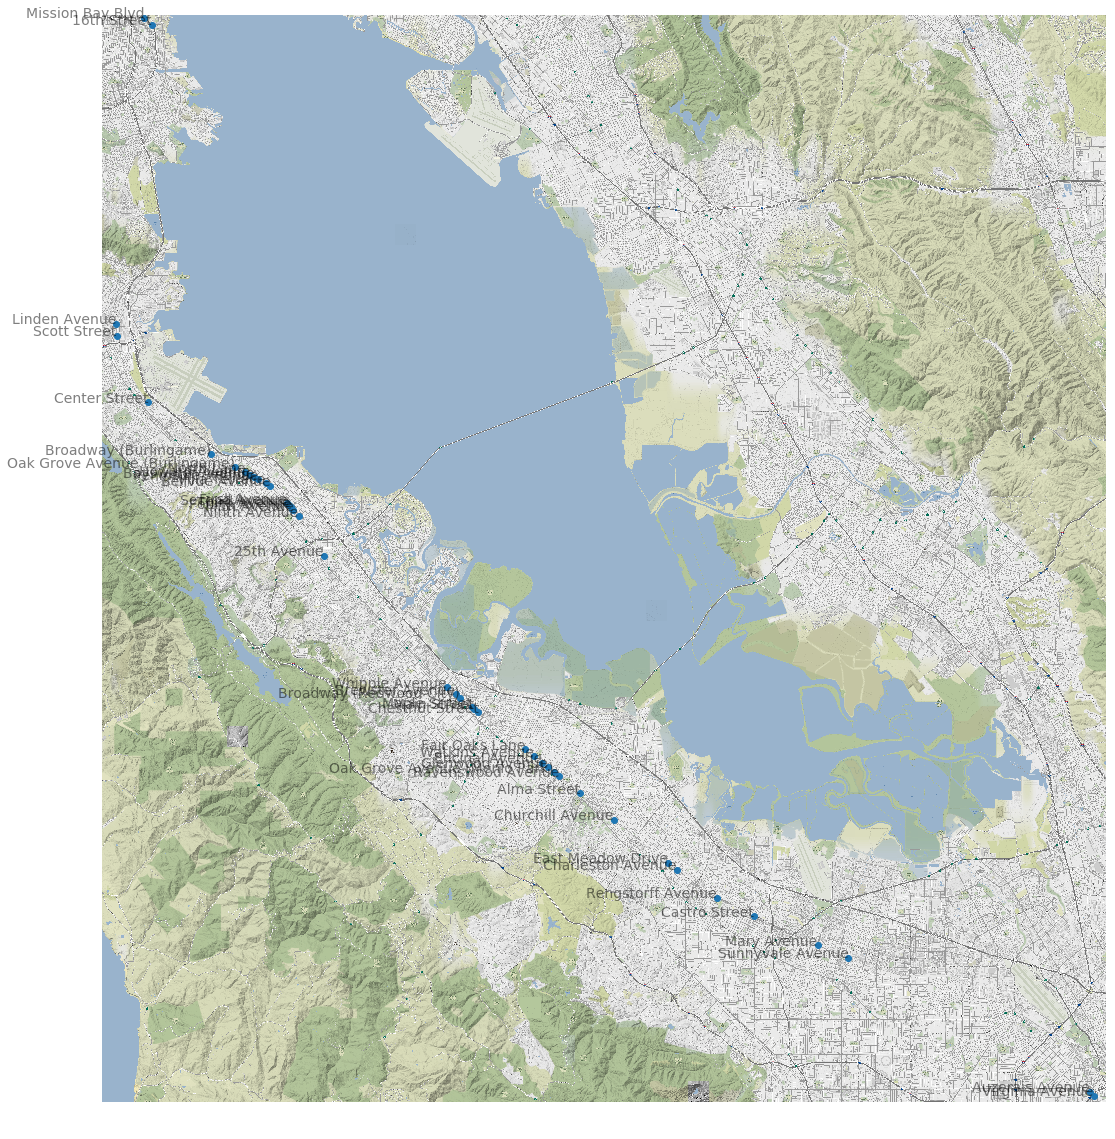

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax = map_points(ax, geodf, 'FolderPath', 15)
plt.show()

In [33]:
geodf['lat'] = geodf.geometry.y

In [35]:
geodf['lon'] = geodf.geometry.x

In [36]:
geodf.head(42)

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Snippet,PopupInfo,HasLabel,LabelID,Label,Label_1,NEAR_FID,NEAR_DIST,geometry,lat,lon
0,0,Point 1,Mission Bay Blvd,2,-1,0.0,None,None,-1,0,GC-1,1,1464,0.003639,POINT Z (-122.3985314 37.76955290000006 0),37.769553,-122.398531
1,0,Point 2,16th Street,2,-1,0.0,None,None,-1,0,GC-2,2,1464,0.007951,POINT Z (-122.3946691 37.76660140000007 0),37.766601,-122.394669
2,0,Point 3,Linden Avenue,2,-1,0.0,None,None,-1,0,GC-3,3,488,0.004250,POINT Z (-122.4131334 37.64225070000003 0),37.642251,-122.413133
3,0,Point 4,Scott Street,2,-1,0.0,None,None,-1,0,GC-4,4,488,0.000815,POINT Z (-122.4130744 37.63722540000003 0),37.637225,-122.413074
4,0,Point 5,Center Street,2,-1,0.0,None,None,-1,0,GC-5,5,1484,0.013388,POINT Z (-122.3965037 37.60948470000005 0),37.609485,-122.396504
5,0,Point 6,Broadway (Burlingame),2,-1,0.0,None,None,-1,0,GC-6,6,-1,-1.000000,POINT Z (-122.3632818 37.58784670000006 0),37.587847,-122.363282
6,0,Point 7,Oak Grove Avenue (Burlingame),2,-1,0.0,None,None,-1,0,GC-7,7,1497,0.009071,POINT Z (-122.3507398 37.58256270000004 0),37.582563,-122.350740
7,0,Point 8,North Lane,2,-1,0.0,None,None,-1,0,GC-8,8,1497,0.003299,POINT Z (-122.345413 37.58033510000007 0),37.580335,-122.345413
8,0,Point 9,Howard Avenue,2,-1,0.0,None,None,-1,0,GC-9,9,1497,0.000544,POINT Z (-122.3428541 37.57925950000003 0),37.579260,-122.342854
9,0,Point 10,Bayswater Avenue,2,-1,0.0,None,None,-1,0,GC-10,10,1497,0.001678,POINT Z (-122.3408209999999 37.57843890000004 0),37.578439,-122.340821


In [37]:
geodf['cross_street'] = geodf['FolderPath']

In [41]:
crossings = geodf[['cross_street', 'lat', 'lon', 'geometry']]

In [42]:
crossings

,cross_street,lat,lon,geometry
0,Mission Bay Blvd,37.769553,-122.398531,POINT Z (-122.3985314 37.76955290000006 0)
1,16th Street,37.766601,-122.394669,POINT Z (-122.3946691 37.76660140000007 0)
2,Linden Avenue,37.642251,-122.413133,POINT Z (-122.4131334 37.64225070000003 0)
3,Scott Street,37.637225,-122.413074,POINT Z (-122.4130744 37.63722540000003 0)
4,Center Street,37.609485,-122.396504,POINT Z (-122.3965037 37.60948470000005 0)
5,Broadway (Burlingame),37.587847,-122.363282,POINT Z (-122.3632818 37.58784670000006 0)
6,Oak Grove Avenue (Burlingame),37.582563,-122.350740,POINT Z (-122.3507398 37.58256270000004 0)
7,North Lane,37.580335,-122.345413,POINT Z (-122.345413 37.58033510000007 0)
8,Howard Avenue,37.579260,-122.342854,POINT Z (-122.3428541 37.57925950000003 0)
9,Bayswater Avenue,37.578439,-122.340821,POINT Z (-122.3408209999999 37.57843890000004 0)


In [44]:
crossings.to_file('at_grade_crossings.shp')

CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING
CPLE_NotSupported in Normalized/laundered field name: 'cross_street' to 'cross_stre'


In [45]:
crossings.to_csv("at_grade_crossings.csv")

In [3]:
geodf2 = geopandas.read_file("Caltrain_GIS/commondata/qaqc")

In [4]:
geodf2.head()

,TAZ,Shape_Leng,Shape_Area,COUNTY,hhs2013ots,pop2013ots,emp2013ots,pop2015acs,hhs2015acs,hhs2040ots,...,pop2040mtc,emp2040mtc,hhs2015rev,pop2015rev,hhs2040rev,pop2040rev,emp2015acs,emp2015rev,emp2040rev,geometry
0,2337.0,43730.956104,7.317612e+07,4,1321,4116,918,3066.0,1316.0,1385,...,3323.0,2776.0,984.010204,3066.0,1444.555869,3323.0,759.977045,759.977045,2776.0,"POLYGON ((6060457.737777382 2148569.630670637,..."
1,2331.0,13392.018002,7.099208e+06,4,873,2050,1460,2319.0,966.0,1022,...,2315.0,5216.0,987.554634,2319.0,965.291718,2315.0,1618.056659,1618.056659,5216.0,"POLYGON ((6058324.0389608 2136300.032178387, 6..."
2,2330.0,17302.433166,1.156609e+07,4,2497,5003,1587,5047.0,2341.0,3141,...,6180.0,2176.0,2518.960424,5047.0,2998.359592,6180.0,1718.445011,1718.445011,2176.0,"POLYGON ((6052051.842515722 2132957.806579396,..."
3,2332.0,12148.686350,7.491443e+06,4,1816,3824,836,4184.0,1795.0,2127,...,4545.0,1167.0,1986.962343,4184.0,2135.929076,4545.0,762.736237,762.736237,1167.0,"POLYGON ((6055539.213821799 2137189.697721899,..."
4,2333.0,10444.733809,6.203024e+06,4,1610,3525,459,3544.0,1548.0,1884,...,4093.0,814.0,1618.678014,3544.0,1767.410497,4093.0,351.104980,351.104980,814.0,"POLYGON ((6051856.588313058 2134855.280802816,..."


In [7]:
geodf2.crs

{'proj': 'lcc',
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lat_0': 36.5,
 'lon_0': -120.5,
 'x_0': 2000000,
 'y_0': 500000.0000000001,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

encountered problem: HTTP Error 404: Not Found


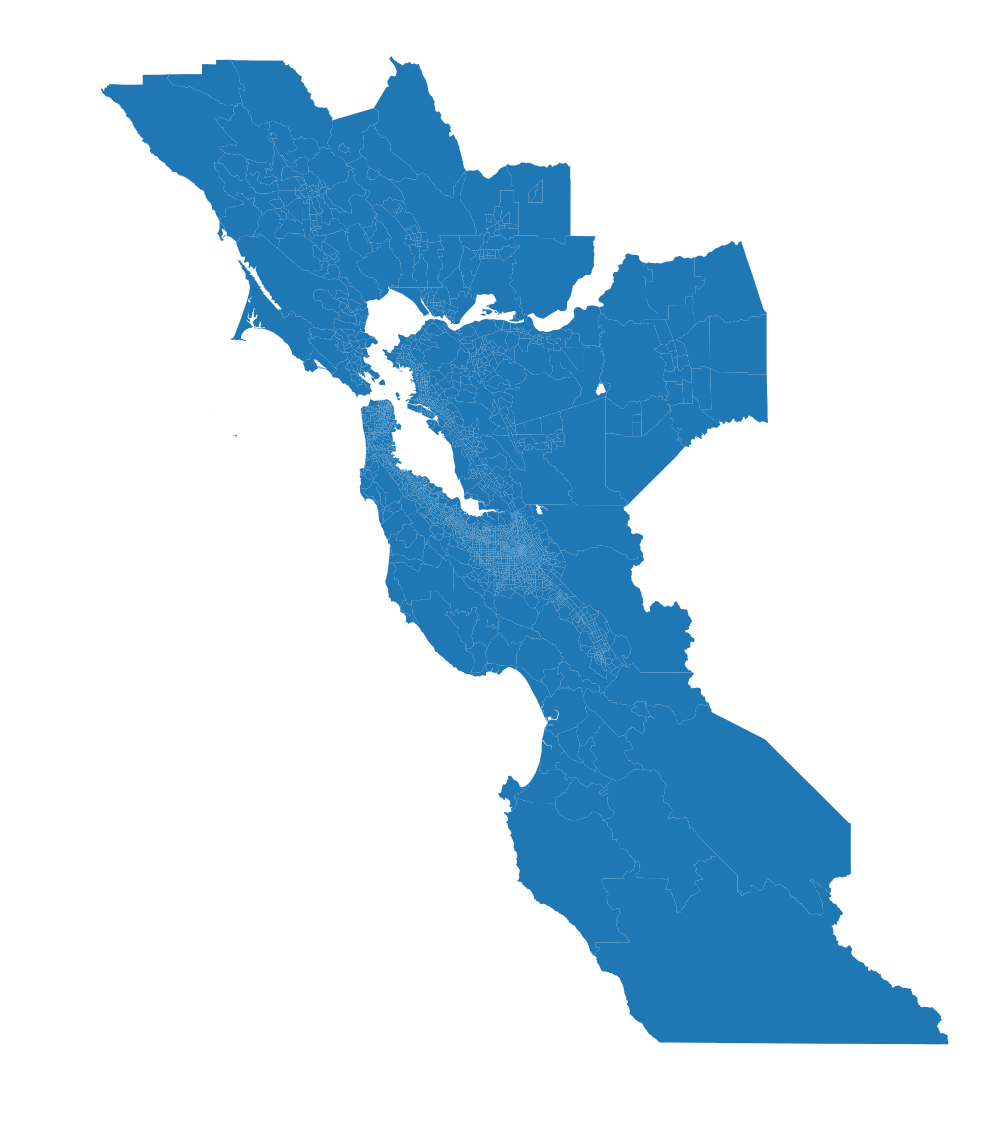

In [8]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax = map_points(ax, geodf2, zoom = 15)
plt.show()

In [18]:
fiona.listlayers('Caltrain_GIS/v105/stationservicearea.gdb')

['Station',
 'T2015_Job_Data',
 'T2016_Population_Data',
 'T2040_Model_Data',
 'Stations_Hm_modeladj',
 'Stations_2m_modeladj']

In [14]:
stationsdf = geopandas.read_file("Caltrain_GIS/v10/stationservicearea.gdb/", driver='FileGDB', layer=0)

In [15]:
stationsdf.head()

,OBJECTID,ZNAME,BART,N_S_ORDER,STATUS,geometry
0,1,4th and King,0,2,0,POINT (6014036.579635635 2110834.142493472)
1,2,22nd St,0,4,0,POINT (6014628.027927801 2103843.733902141)
2,3,Bayshore,0,7,0,POINT (6011540.836267561 2085747.579477727)
3,4,South San Francisco,0,8,0,POINT (6009841.536188468 2066344.160279393)
4,5,San Bruno,0,9,0,POINT (6008080.418647721 2057785.139011636)


In [29]:
stationsdf.crs

{'proj': 'lcc',
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lat_0': 36.5,
 'lon_0': -120.5,
 'x_0': 2000000,
 'y_0': 500000.0000000001,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [28]:
stationsdf.crs = {'proj': 'lcc',
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lat_0': 36.5,
 'lon_0': -120.5,
 'x_0': 2000000,
 'y_0': 500000.0000000001,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

encountered problem: HTTP Error 404: Not Found


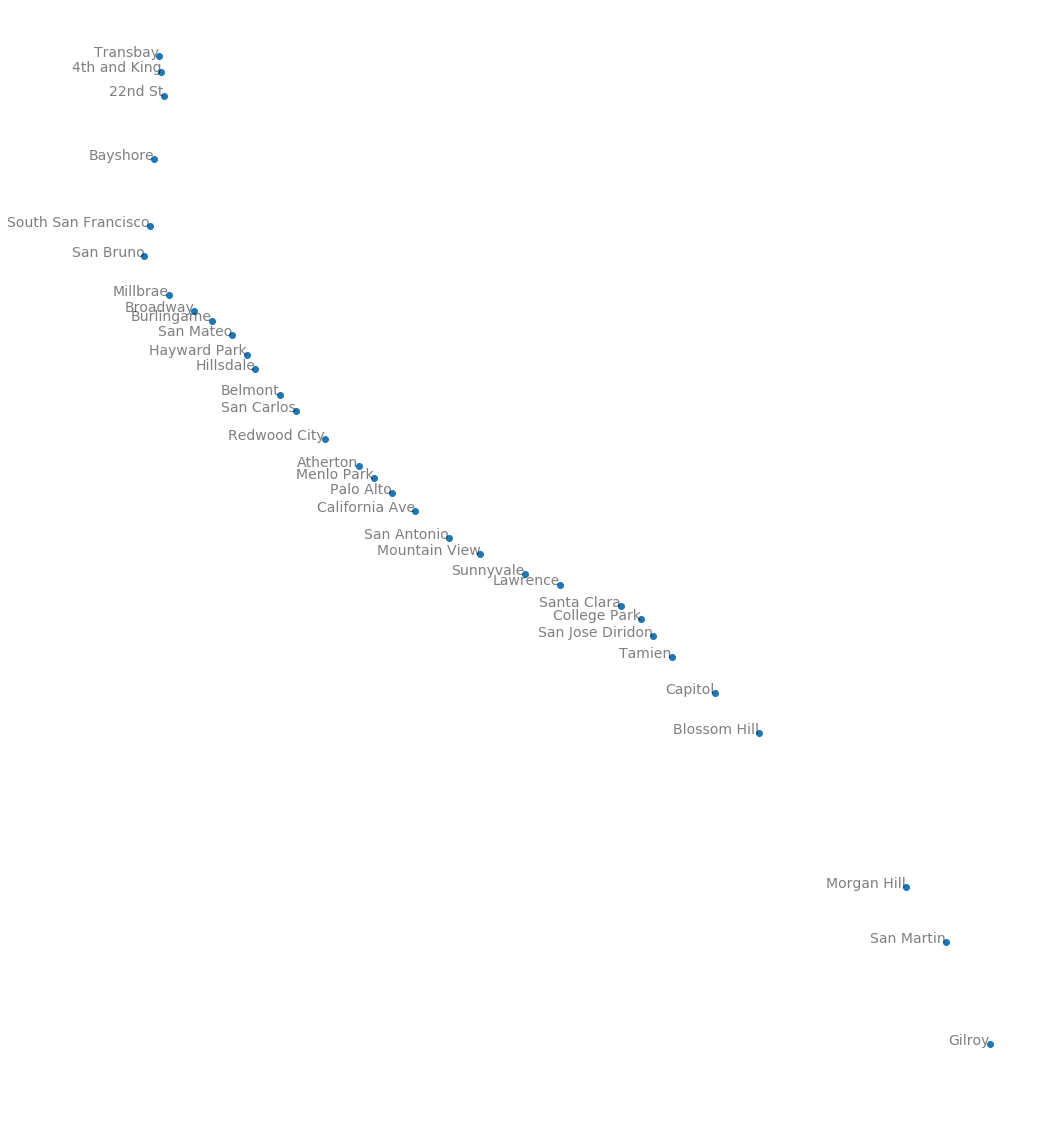

In [32]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax = map_points(ax, stationsdf, zoom = 15, label_by='ZNAME')
plt.show()